In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns
import datetime as dt
import numpy as np
import sqlite3
import pandas as pd

In [6]:
columns = ['WAR_CLAIM_DATE',
        'WAR_DEFECT_CODE',
        'VIN_MODEL_YR',
        'VIN_FACTORY',
        'VIN_MODEL_TYPE',
        'WAR_ORIG_DISTR_CDE',
        'WAR_RESP_DISTR_CDE',
        'WAR_EXCH_RATE_AMT',
        'CLAIM_LABOR_HRS_QTY',
        'WAR_LABOR_CHG_AMT_USD',
        'WAR_PARTS_CHG_AMT_USD',
        'WAR_HDLG_CHG_AMT_USD',
        'WAR_TOTAL_CHG_AMT_USD',
        'PHASE_TYPE',
        'PART_COST_25',
        'DRIVER_PASSENGER',
        'DIR_NUMBER',
        'NA_FCTRY_YES_NO',
        'PAB_TYPE',
        'DAB_TYPE',
        'STATE_CODE',
        'COUNTRY',
        'ZONE_REGION',
        'CLAIM_SUBLET_AMT_USD',
        'SUBLET_TYPE1_CODE',
        'SUBLET_TYPE2_CODE',
        'SUBLET_TYPE_DESC',
        'SUBLET_YES_NO',
        'WRWHA1_LABOR_CHG_AMT_USD',
        'FRGT_SUBL_TAX_AMT_USD'
       ]

data_type = {
        'WAR_CLAIM_DATE': str,
        'WAR_DEFECT_CODE': str,
        'VIN_MODEL_YR': str,
        'VIN_FACTORY': str,
        'VIN_MODEL_TYPE': str,
        'WAR_ORIG_DISTR_CDE': str,
        'WAR_RESP_DISTR_CDE': str,
        'WAR_EXCH_RATE_AMT': np.float32,
        'CLAIM_LABOR_HRS_QTY': np.float32,
        'WAR_LABOR_CHG_AMT_USD': np.float32,
        'WAR_PARTS_CHG_AMT_USD': np.float32,
        'WAR_HDLG_CHG_AMT_USD': np.float32,
        'WAR_TOTAL_CHG_AMT_USD': np.float32,
        'PHASE_TYPE': str,
        'PART_COST_25': str,
        'DRIVER_PASSENGER': str,
        'DIR_NUMBER': str,
        'NA_FCTRY_YES_NO': str,
        'PAB_TYPE': str,
        'DAB_TYPE': str,
        'STATE_CODE': str,
        'COUNTRY': str,
        'ZONE_REGION': str,
        'CLAIM_SUBLET_AMT_USD': np.float32,
        'SUBLET_TYPE1_CODE': str,
        'SUBLET_TYPE2_CODE': str,
        'SUBLET_TYPE_DESC': str,
        'SUBLET_YES_NO': str,
        'WRWHA1_LABOR_CHG_AMT_USD': np.float32,
        'FRGT_SUBL_TAX_AMT_USD': np.float32
    }

In [7]:
%%time
conn = sqlite3.connect(r'D:\temp\some_database.db')
cursor = conn.cursor()

# Since we are going to load/re-create the complaint's table in its entirety, DROP it
cursor.execute('DROP TABLE IF EXISTS dataframe')

chunksize = 40000
j = 0

begin = dt.datetime.now()

# use the columns list to define the column names of the complaints table
for df in pd.read_csv(r'D:\temp\DAB_PAB_Raw_Claims.csv', names=columns, dtype=data_type, chunksize=chunksize, 
                      delimiter=',', iterator=True, error_bad_lines=False):    
    j+=1
    # To print on same line, use '\r' and end='' option with the print function
    print('\r'+'{} seconds: completed {} rows'.format((dt.datetime.now() - begin).seconds, j*chunksize),end='')

    df.to_sql('dataframe', conn, if_exists='append', index=False)
cursor.close()
conn.close()

315 seconds: completed 13000000 rowsWall time: 5min 16s


In [11]:
%%time
conn = sqlite3.connect(r'D:\temp\some_database.db')

sql = """
SELECT
    count(*) as qty

FROM
    dataframe
"""

df = pd.read_sql_query(sql, conn)

Wall time: 4.52 s


In [23]:
%%time
conn = sqlite3.connect(r'D:\temp\some_database.db')

sql = """
SELECT
    WAR_CLAIM_DATE,
    SUM(WAR_TOTAL_CHG_AMT_USD) AS TOTALCHG

FROM
    dataframe
    
GROUP BY
    WAR_CLAIM_DATE
"""

by_month = pd.read_sql_query(sql, conn)
by_month = by_month.set_index('WAR_CLAIM_DATE')

Wall time: 20 s


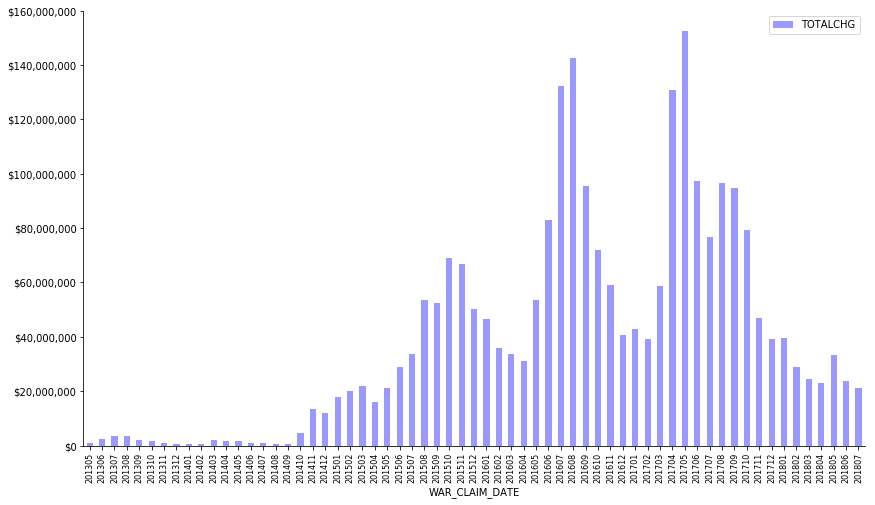

In [24]:
fig = plt.figure(figsize=(14,8))
ax = plt.subplot(1,1,1)
ax.yaxis.set_major_formatter(FuncFormatter('${:,.0f}'.format))
plt.xticks(rotation=270, fontsize=8)
by_month.plot.bar(ax=ax, color='b', alpha=0.4)
sns.despine()